In [2]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
mp_key = "0DGGEC1I1pS8KvdIsdLZpSI8D4eSE7ux"
mp_id = "mp-648"

from pymatgen.analysis.diffraction.xrd import XRDCalculator

with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id) 

conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure() 

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
xrd = XRDCalculator('CuKa',1.54060)
pattern = xrd.get_pattern(conv_struc)

In [5]:
#Premier pic

print("Concernant le premier pic de diffraction : ")
print("\n - Les indices hkl associés sont : ", pattern.hkls[0])
print("\n - l'intensitée du pic est : ", pattern.y[0])
print("\n - l'angle associé est : ", pattern.x[0], "°" )
print("\n - distance interplan = ",pattern.d_hkls[0], "Å")






Concernant le premier pic de diffraction : 

 - Les indices hkl associés sont :  [{'hkl': (1, 1, 1), 'multiplicity': 8}]

 - l'intensitée du pic est :  47.104955194280684

 - l'angle associé est :  23.715199892820653 °

 - distance interplan =  3.7518004381019505 Å


In [6]:
#Deuxième pic

print("Concernant le premier pic de diffraction : ")
print("\n - Les indices hkl associés sont : ", pattern.hkls[0])
print("\n - l'intensitée du pic est : ", pattern.y[0])
print("\n - l'angle associé est : ", pattern.x[0], "°" )
print("\n - distance interplan = ",pattern.d_hkls[1], "Å" )


Concernant le premier pic de diffraction : 

 - Les indices hkl associés sont :  [{'hkl': (1, 1, 1), 'multiplicity': 8}]

 - l'intensitée du pic est :  47.104955194280684

 - l'angle associé est :  23.715199892820653 °

 - distance interplan =  3.2491544893258753 Å


In [7]:
#Troisième pic

print("Concernant le premier pic de diffraction : ")
print("\n - Les indices hkl associés sont : ", pattern.hkls[0])
print("\n - l'intensitée du pic est : ", pattern.y[0])
print("\n - l'angle associé est : ", pattern.x[0], "°" )
print("\n - distance interplan = ",pattern.d_hkls[2], "Å")


Concernant le premier pic de diffraction : 

 - Les indices hkl associés sont :  [{'hkl': (1, 1, 1), 'multiplicity': 8}]

 - l'intensitée du pic est :  47.104955194280684

 - l'angle associé est :  23.715199892820653 °

 - distance interplan =  2.29749917252504 Å


Comme vu dans le cadre du cours, l'intensité des pics diminue avec l'augmentation de l'angle theta (facteur de forme atomique qui diminue).


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

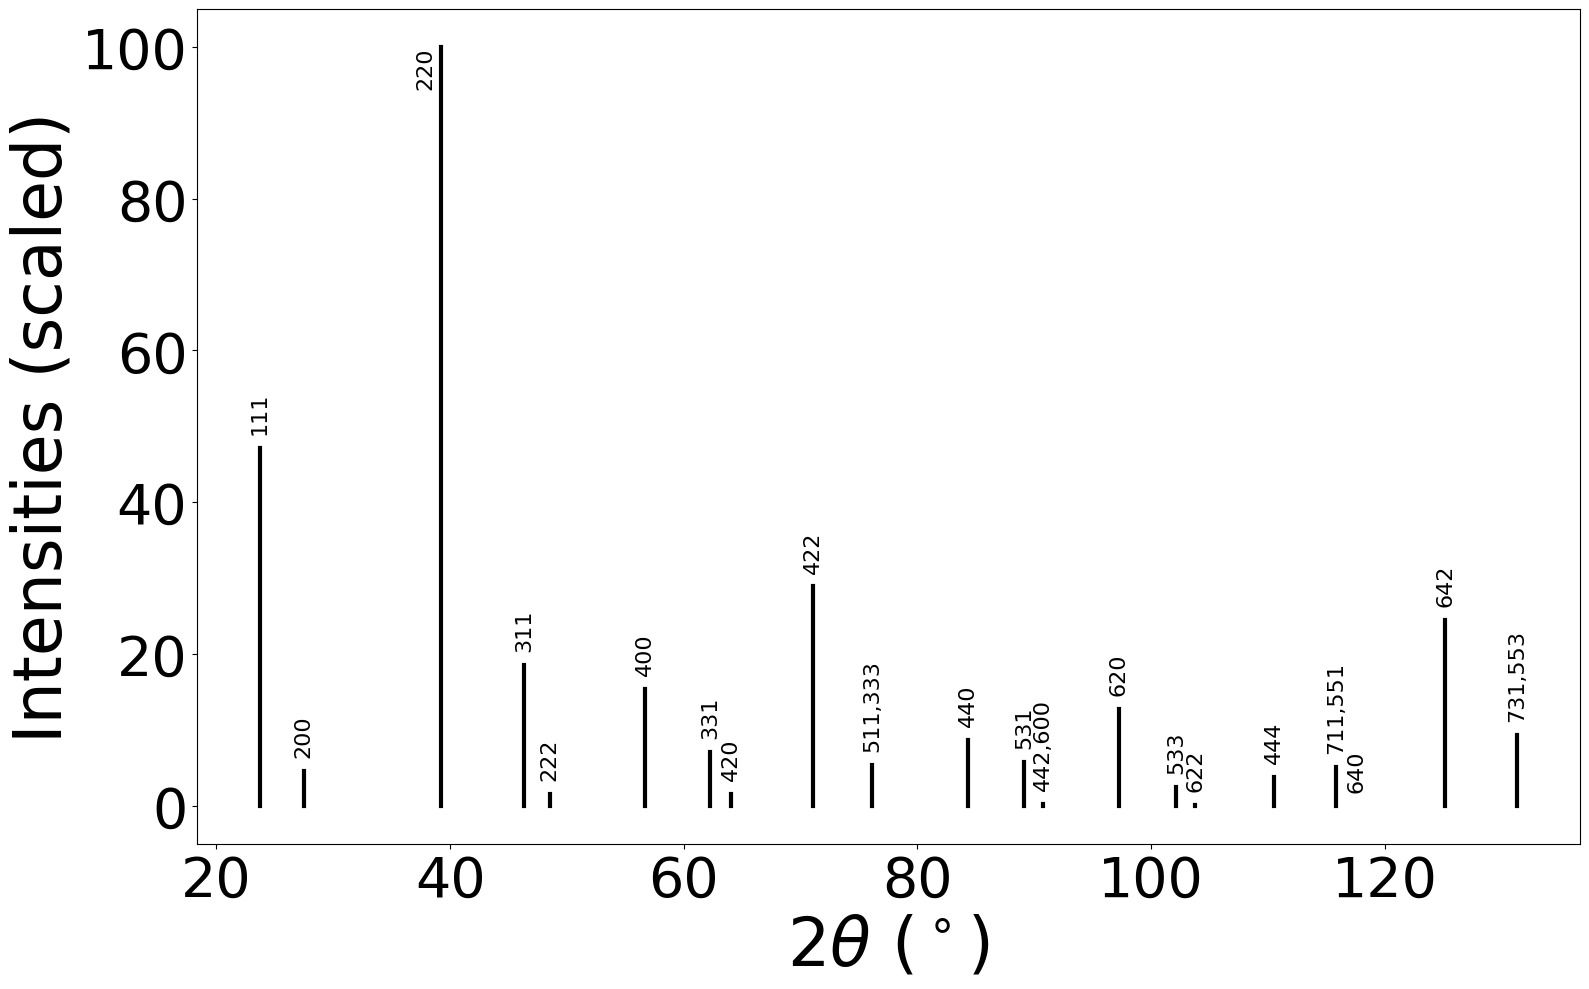

In [8]:
print("Comme vu dans le cadre du cours, l'intensité des pics diminue avec l'augmentation de l'angle theta (facteur de forme atomique qui diminue).")

xrd.get_plot(conv_struc, two_theta_range=(0, 140))
